Author: Connor Finn <br>
Date: May 28, 2020


This code is based off of the tutorial provided on this [webpage](https://github.com/shakasom/rs-python-tutorials/blob/master/Cloud_Optimized_Geotiffs.ipynb). I will expand upon the tutorial and hopefully find some useful information from the LANDSAT 8 images.


In [1]:
# a few useful imports 
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio      # This is for working with geospacial data
from rasterio.plot import show

In [33]:
# URL construction for AWS Data:

# part 1
path_one = 'http://landsat-pds.s3.amazonaws.com/c1/'
# part 2 
path_two = 'L8/013/032/'  # Landsat 8, path 13 , row 32
# part 3
path_three = 'LC08_L1TP_013032_20200121_20200128_01_T1/' # image id
# part 4
path_four = 'LC08_L1TP_013032_20200121_20200128_01_T1_B4.TIF'  # image id with band included

fpath1 = path_one + path_two + path_three + path_four


In [34]:
fpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'

def rasterio_open(f):
    return rio.open(f)

src_image = rasterio_open(fpath1)
print(src_image.profile)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7651, 'height': 7781, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(30.0, 0.0, 527985.0,
       0.0, -30.0, 4582215.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


In [35]:
overview= src_image.overviews(1)[-1]
overview

81

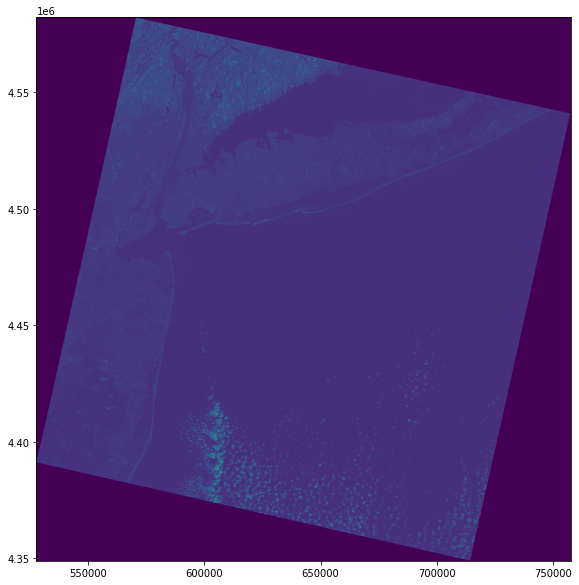

In [36]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [37]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype("f4")
src_image_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
src_image_array[src_image_array==0] = np.nan

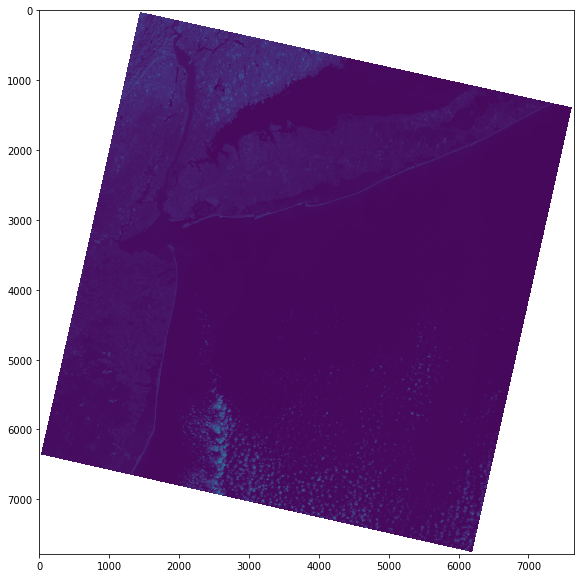

In [39]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array, ax=ax)
plt.show()

In [40]:
src_image.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7651, 'height': 7781, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(30.0, 0.0, 527985.0,
       0.0, -30.0, 4582215.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

# Subset the image

In [116]:

# This is done using column and row offsets, and window width and height

col_offset = 1600
row_offset = 1900
width = 750
height = 800


window = rio.windows.Window(col_offset, row_offset, width, height)

In [117]:
subset = src_image.read(1, window=window)

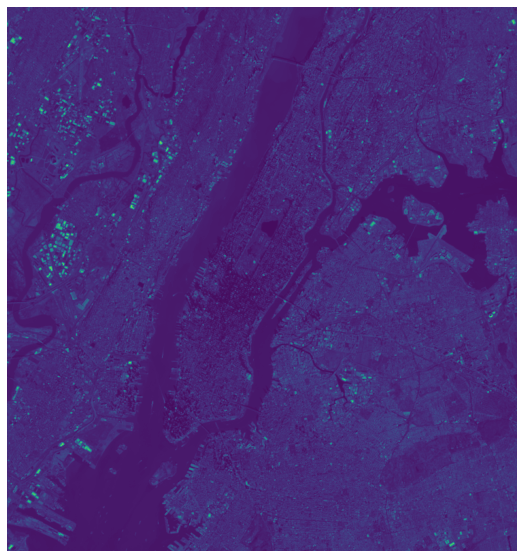

In [118]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

In [11]:
rpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B4.TIF'
gpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B3.TIF'
bpath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/003/065/LC08_L1TP_003065_20190925_20191017_01_T1/LC08_L1TP_003065_20190925_20191017_01_T1_B2.TIF'

In [12]:
red = rio.open(rpath)
green = rio.open(gpath)
blue = rio.open(bpath)

In [13]:
red_array = red.read(1)
green_array = green.read(1)
blue_array = blue.read(1)

In [14]:
src_image.transform

NameError: name 'src_image' is not defined

In [ ]:
# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=red.width, height=red.height, 
              count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as rgb:
    rgb.write(blue.read(1),1) 
    rgb.write(green.read(1),2) 
    rgb.write(red.read(1),3) 
    rgb.close()

In [25]:
rgb = rio.open("RGB.tiff")

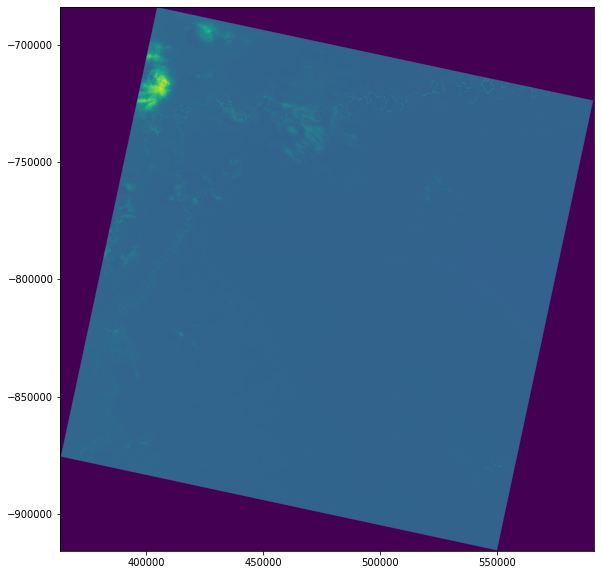

In [26]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(rgb, ax=ax, cmap="viridis")
plt.show()